In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_data = pd.read_csv('./data/total_rent.csv')
train_data['month'] = train_data['month'].astype('object')
train_data['hour'] = train_data['hour'].astype('object')
train_data['weekday'] = train_data['weekday'].astype('object')
train_data['season'] = train_data['season'].astype('object')
train_data.head(5)

train_data

,Unnamed: 0,STATION,기온,강수량,풍속,습도,적설,year,month,day,hour,season,weekday,RENTCOUNT
0,0,1,-8.8,0.0,0.1,90.0,8.8,2013,1,1,0,3,1,0.0
1,1,1,-8.5,0.0,0.9,90.0,8.8,2013,1,1,1,3,1,0.0
2,2,1,-8.5,0.0,1.0,89.0,8.8,2013,1,1,2,3,1,0.0
3,3,1,-9.0,0.0,0.7,91.0,8.8,2013,1,1,3,3,1,0.0
4,4,1,-9.1,0.0,0.6,92.0,8.8,2013,1,1,4,3,1,0.0
5,5,1,-9.4,0.0,0.5,92.0,8.8,2013,1,1,5,3,1,0.0
6,6,1,-9.0,0.0,1.4,93.0,8.8,2013,1,1,6,3,1,0.0
7,7,1,-8.3,0.0,0.2,94.0,9.6,2013,1,1,7,3,1,0.0
8,8,1,-7.3,0.0,1.7,96.0,10.5,2013,1,1,8,3,1,0.0
9,9,1,-6.4,2.2,0.9,96.0,12.8,2013,1,1,9,3,1,0.0


In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = train_data.iloc[:,2:13]  #independent columns
y = train_data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
#bestfeatures = SelectKBest(score_func=chi2, k=10)
#fit = bestfeatures.fit(X,y)
rf = RandomForestRegressor(n_estimators = 11)
rf.fit(X, y)
importances = list(rf.feature_importances_)
importances
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
#featureScores = pd.concat([dfcolumns,dfscores.astype('int64')],axis=1)
#featureScores.columns = ['Specs','Score']  #naming the dataframe columns

#print(featureScores.nlargest(10,'Score'))  #print 10 best features

[0.23848937358431702,
 0.04326254952213762,
 0.02398025612476582,
 0.07534534167112401,
 0.0038191187808401276,
 0.028461042491116476,
 0.03186986111521348,
 0.02913094174758846,
 0.4838038285488601,
 0.01277356678606243,
 0.02906411962797449]

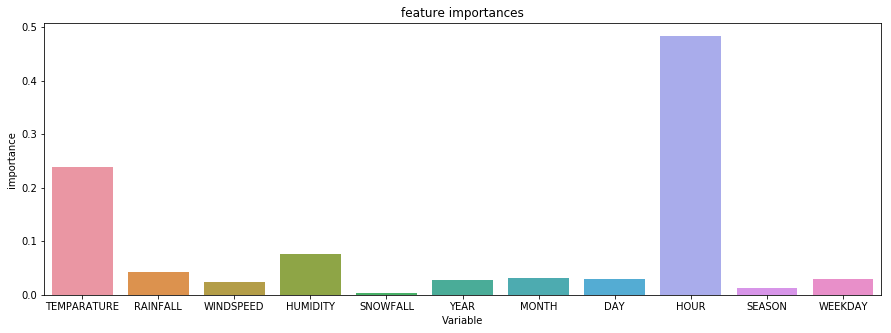

In [31]:
plt.figure(figsize=(15,5))
featureSpecs = {'VARIABLE':['TEMPARATURE', 'RAINFALL', 'WINDSPEED', 'HUMIDITY', 'SNOWFALL', 'YEAR', 'MONTH', 'DAY','HOUR','SEASON','WEEKDAY']}
ax = sns.barplot(x=featureSpecs['VARIABLE'], y=importances)
ax.set(xlabel='Variable', ylabel='importance')
plt.xticks(np.arange(11), featureSpecs['VARIABLE'])
plt.title('feature importances')
plt.show()

In [5]:
n_data = train_data.shape[0]
p_trn = 0.7
n_trn = round(n_data * p_trn)
n_tst = n_data - n_trn
print(n_data, n_trn, n_tst)

idx_data = pd.Series(range(0,3784320))
idx_data_perm = np.random.permutation(idx_data)
print(idx_data_perm)

idx_trn = idx_data_perm[0:n_trn]
idx_tst = idx_data_perm[n_trn:n_data]
print(len(idx_trn),len(idx_tst))

3784320 2649024 1135296
[2012939  582442 3441349 ... 1946837  209158 2950627]
2649024 1135296


In [6]:
temp = train_data[train_data['STATION'] == 3]
result1 = temp
result1

,Unnamed: 0,STATION,기온,강수량,풍속,습도,적설,year,month,day,hour,season,weekday,RENTCOUNT
52560,52560,3,-8.8,0.0,0.1,90.0,8.8,2013,1,1,0,3,1,0.0
52561,52561,3,-8.5,0.0,0.9,90.0,8.8,2013,1,1,1,3,1,0.0
52562,52562,3,-8.5,0.0,1.0,89.0,8.8,2013,1,1,2,3,1,0.0
52563,52563,3,-9.0,0.0,0.7,91.0,8.8,2013,1,1,3,3,1,0.0
52564,52564,3,-9.1,0.0,0.6,92.0,8.8,2013,1,1,4,3,1,0.0
52565,52565,3,-9.4,0.0,0.5,92.0,8.8,2013,1,1,5,3,1,0.0
52566,52566,3,-9.0,0.0,1.4,93.0,8.8,2013,1,1,6,3,1,0.0
52567,52567,3,-8.3,0.0,0.2,94.0,9.6,2013,1,1,7,3,1,0.0
52568,52568,3,-7.3,0.0,1.7,96.0,10.5,2013,1,1,8,3,1,0.0
52569,52569,3,-6.4,2.2,0.9,96.0,12.8,2013,1,1,9,3,1,0.0


In [7]:
temp = temp[temp['year'] == 2015]
temp = temp[temp['month'] == 1]
temp = temp[temp['day'] == 1]

temp

,Unnamed: 0,STATION,기온,강수량,풍속,습도,적설,year,month,day,hour,season,weekday,RENTCOUNT
70080,70080,3,-4.1,0.3,4.2,82.0,0.5,2015,1,1,0,3,3,0.0
70081,70081,3,-5.7,0.0,2.8,74.0,0.5,2015,1,1,1,3,3,0.0
70082,70082,3,-6.4,0.0,2.6,60.0,0.5,2015,1,1,2,3,3,0.0
70083,70083,3,-6.5,0.0,2.7,53.0,0.5,2015,1,1,3,3,3,0.0
70084,70084,3,-6.6,0.0,2.5,61.0,0.5,2015,1,1,4,3,3,0.0
70085,70085,3,-7.0,0.0,2.4,73.0,0.5,2015,1,1,5,3,3,0.0
70086,70086,3,-7.2,0.0,1.4,79.0,0.5,2015,1,1,6,3,3,0.0
70087,70087,3,-7.6,0.0,1.4,74.0,0.5,2015,1,1,7,3,3,0.0
70088,70088,3,-8.3,0.0,1.1,74.0,0.5,2015,1,1,8,3,3,3.0
70089,70089,3,-7.4,0.0,0.9,61.0,0.5,2015,1,1,9,3,3,0.0


In [8]:
trnx = result1.iloc[:,1:13]
trny = result1.iloc[:,13]
tstx = temp.iloc[:,1:13]
tsty = temp.iloc[:,13]

In [42]:
rf = RandomForestRegressor(n_estimators = 11)
rf.fit(trnx, trny)
predictions = rf.predict(X=tstx)

predictions

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.72727273, 2.18181818, 0.63636364,
       0.36363636, 0.18181818, 0.81818182, 0.81818182, 1.45454545,
       4.27272727, 0.36363636, 2.81818182, 0.63636364, 0.        ,
       0.        , 0.        , 0.        , 0.18181818])

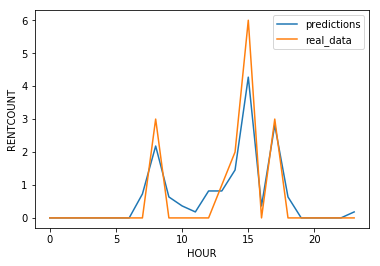

In [43]:
from pylab import plot, show, legend, title, xlabel, ylabel
real_data = []
real_data = temp.iloc[:, 13]
hour = temp.iloc[:, 10]
plot(hour, predictions, hour, real_data)
xlabel('HOUR')
ylabel('RENTCOUNT')
legend(['predictions', 'real_data'], loc='best')
show()

In [44]:
# RSME 계산
errors = np.sqrt(np.mean((predictions-tsty)**2))
print('Error:', round(errors, 2), 'degrees.')

Error: 0.51 degrees.
